<a href="https://colab.research.google.com/github/adhilcodes/Web-page-Phishing-Detection/blob/main/project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement: Web page Phishing Detection



In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
data = pd.read_csv("/content/dataset_phishing.csv")
print(data.shape)
data.head()

(11430, 89)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
data = data.iloc[:, 1:] # removed unwanted column
data['status'] = data['status'].replace({'legitimate': 0, 'phishing': 1}) # converted target variables into numerical
print(data.shape)
data.head()

(11430, 88)


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

data contains only numerical features

In [7]:
# testing if there is some null values
df_null = data.isnull().sum()
for i in df_null:
  if i>0:
    print(i)

In [8]:
# checking for class imbalance
data['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

Dataset class is balanced

### Pair of features having correlation greater than 0.5


In [68]:
corr_ = data.corr()
z = [[str(i),str(j)] for i in corr_.columns for j in corr_.columns if(corr_.loc[i,j]>abs(0.4)) & (i!=j)]
print("No. of pairs having correlation greater than 0.5: ", len(z)/2, "\n \n", z)

No. of pairs having correlation greater than 0.5:  73.0 
 
 [['length_url', 'ip'], ['length_url', 'nb_dots'], ['length_url', 'nb_qm'], ['length_url', 'nb_and'], ['length_url', 'nb_eq'], ['length_url', 'nb_underscore'], ['length_url', 'nb_slash'], ['length_url', 'ratio_digits_url'], ['length_url', 'length_words_raw'], ['length_url', 'char_repeat'], ['length_url', 'longest_words_raw'], ['length_url', 'longest_word_path'], ['length_url', 'avg_word_path'], ['length_hostname', 'nb_dots'], ['length_hostname', 'tld_in_subdomain'], ['length_hostname', 'longest_word_host'], ['ip', 'length_url'], ['ip', 'nb_qm'], ['ip', 'nb_eq'], ['ip', 'ratio_digits_url'], ['ip', 'tld_in_subdomain'], ['ip', 'length_words_raw'], ['nb_dots', 'length_url'], ['nb_dots', 'length_hostname'], ['nb_dots', 'nb_and'], ['nb_dots', 'nb_eq'], ['nb_dots', 'http_in_path'], ['nb_dots', 'nb_subdomains'], ['nb_dots', 'length_words_raw'], ['nb_hyphens', 'length_words_raw'], ['nb_qm', 'length_url'], ['nb_qm', 'ip'], ['nb_qm', 'nb_

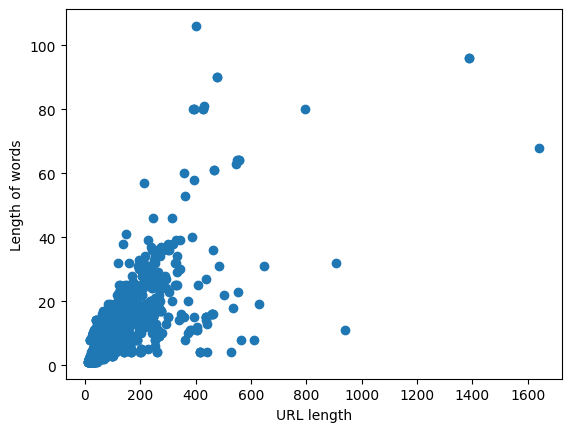

In [85]:
plt.scatter(data=data, x='length_url', y='length_words_raw')
plt.xlabel('URL length')
plt.ylabel('Length of words')
plt.show()

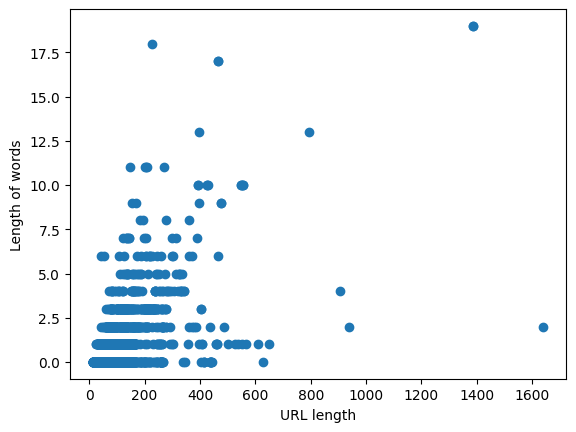

In [86]:
plt.scatter(data=data, x='length_url', y='nb_eq')
plt.xlabel('URL length')
plt.ylabel('Length of words')
plt.show()

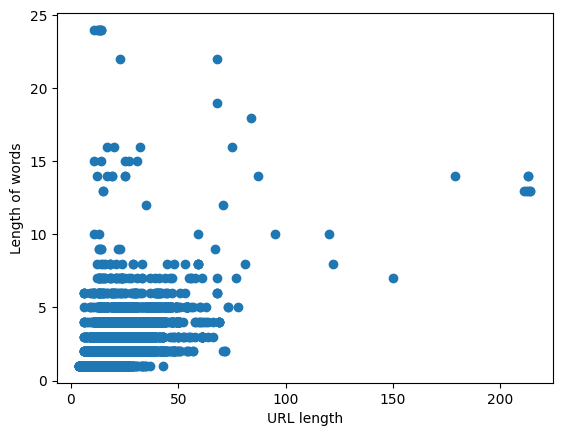

In [83]:
plt.scatter(data=data, x='length_hostname', y='nb_dots')
plt.xlabel('URL length')
plt.ylabel('Length of words')
plt.show()

In [10]:
# features highly correlated with the target in descending order
corr_matrix = data.corr(numeric_only=True)

corr_with_price = corr_matrix['status']
sorted_correlations = corr_with_price.sort_values(ascending=False)
sorted_correlations

status                  1.000000
google_index            0.731171
ratio_digits_url        0.356395
domain_in_title         0.342807
phish_hints             0.335393
                          ...   
ratio_nullHyperlinks         NaN
ratio_intRedirection         NaN
ratio_intErrors              NaN
submit_email                 NaN
sfh                          NaN
Name: status, Length: 88, dtype: float64

In [11]:
# listing featurees having correlation>0.2 with target variable('status')
c = 0
for feature, corr in sorted_correlations.iteritems():
    if corr > 0.2 and feature != 'status':
        c+=1
        print(f"{c}: {feature}: {corr}")

1: google_index: 0.7311708381262626
2: ratio_digits_url: 0.3563945701626024
3: domain_in_title: 0.3428069729938348
4: phish_hints: 0.3353927377156508
5: ip: 0.3216977823874091
6: nb_qm: 0.2943190708457299
7: length_url: 0.24858046741991785
8: nb_slash: 0.2422699601753399
9: length_hostname: 0.23832240376368571
10: nb_eq: 0.23338630384578937
11: ratio_digits_host: 0.22433492719580636
12: shortest_word_host: 0.22308404240883373
13: prefix_suffix: 0.21468073790291617
14: longest_word_path: 0.21270911546421986
15: tld_in_subdomain: 0.20888415296656912
16: empty_title: 0.2070428078394182
17: nb_dots: 0.20702877302594608
18: longest_words_raw: 0.20014657829049398


<ipython-input-11-7b667e418b14>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, corr in sorted_correlations.iteritems():


In [12]:
# Removing all features having orrelation<0.2 with target variable('status')

selected_features = []

for feature, corr in sorted_correlations.items():
    if corr > 0.2:
        selected_features.append(feature)

data_filtered = data[selected_features]
print(data_filtered.shape)
data_filtered.head()

(11430, 19)


,status,google_index,ratio_digits_url,domain_in_title,phish_hints,ip,nb_qm,length_url,nb_slash,length_hostname,nb_eq,ratio_digits_host,shortest_word_host,prefix_suffix,longest_word_path,tld_in_subdomain,empty_title,nb_dots,longest_words_raw
0,0,1,0.000000,0,0,0,0,37,3,19,0,0.0,3,0,6,0,0,3,11
1,1,1,0.220779,1,0,1,0,77,5,23,0,0.0,19,0,32,0,0,1,32
2,1,1,0.150794,1,0,1,1,126,5,50,3,0.0,3,1,17,1,0,4,17
3,0,0,0.000000,1,0,0,0,18,2,11,0,0.0,5,0,0,0,0,2,5
4,0,0,0.000000,0,0,0,0,55,5,15,0,0.0,3,0,11,0,0,2,11


### Looking for outliers

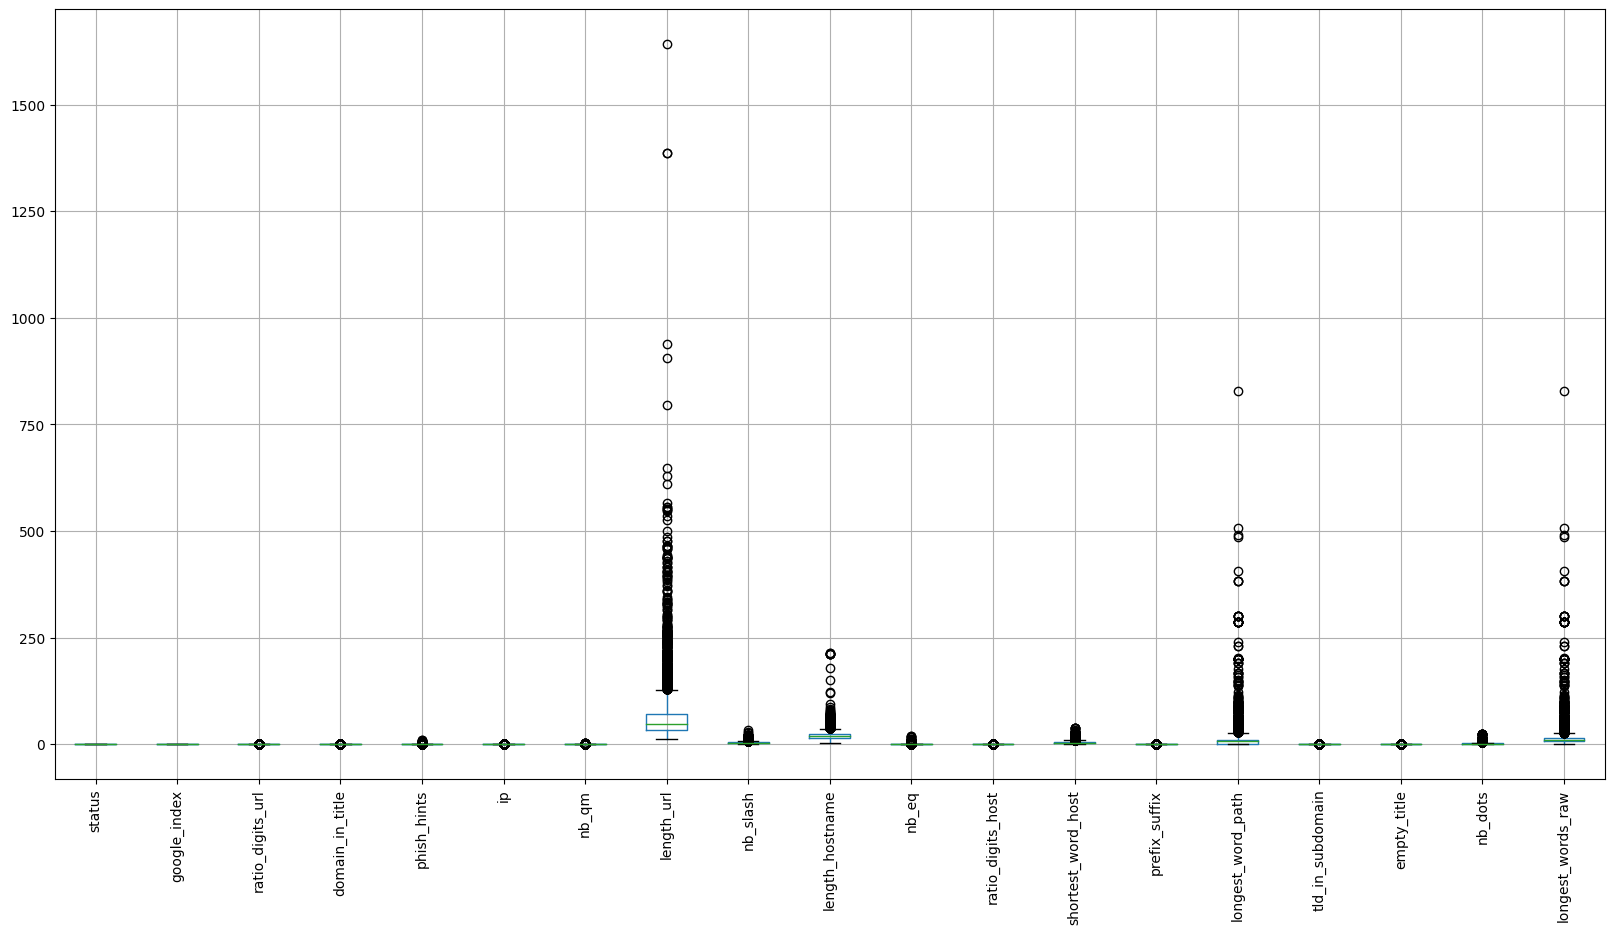

In [13]:
plt.figure(figsize=(20, 10))
data_filtered.boxplot(rot=90)
plt.show()

Outliers are present. So we need to find and remove outliers using IQR method.

In [14]:
def remove_outliers(data):
    cleaned_data = data.copy()

    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data = remove_outliers(data_filtered)
cleaned_data.shape

(2992, 19)

If we remove outliers using IQR very large number of observation will lose. So we will do another approach,

In [15]:
def calculate_outlier_percentage(data):

    outlier_percentages = []

    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
        num_outliers = outliers.sum()

        outlier_percentage = (num_outliers / len(data)) * 100
        outlier_percentages.append((col, round(outlier_percentage, 2)))

    # Create a Series with column names and their outlier percentages
    outlier_percentage_series = pd.Series(dict(outlier_percentages))

    return outlier_percentage_series


outlier_percentages = calculate_outlier_percentage(data_filtered)
print(outlier_percentages.sort_values(ascending=False))

domain_in_title       22.41
prefix_suffix         20.24
phish_hints           17.86
ip                    15.06
nb_eq                 13.68
nb_qm                 13.60
ratio_digits_host     13.15
empty_title           12.48
shortest_word_host     9.56
longest_words_raw      9.06
ratio_digits_url       8.16
longest_word_path      8.13
length_hostname        6.78
length_url             5.42
tld_in_subdomain       5.01
nb_dots                4.96
nb_slash               3.51
google_index           0.00
status                 0.00
dtype: float64


All the remaining feature have almost <= 20% outliers, so we will not dropping any column

In [16]:
# sns.pairplot(data_filtered)

In [17]:
# checking for class imbalance
data_filtered['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

### Standardizing data

In [18]:
std_sclr = StandardScaler()
data_scaled = std_sclr.fit_transform(data_filtered)
data_scaled = pd.DataFrame(data_scaled, columns=[col for col in data_filtered.columns])
print(data_scaled.shape)
data_scaled.head()

(11430, 19)


,status,google_index,ratio_digits_url,domain_in_title,phish_hints,ip,nb_qm,length_url,nb_slash,length_hostname,nb_eq,ratio_digits_host,shortest_word_host,prefix_suffix,longest_word_path,tld_in_subdomain,empty_title,nb_dots,longest_words_raw
0,-1.0,0.934264,-0.594651,-1.860473,-0.388973,-0.421020,-0.387464,-0.436327,-0.685161,-0.193964,-0.293683,-0.267868,-0.512450,-0.503825,-0.197666,-0.229732,-0.377549,0.379116,-0.198974
1,1.0,0.934264,1.876053,0.537498,-0.388973,2.375182,-0.387464,0.287067,0.377443,0.177207,-0.293683,-0.267868,3.547014,-0.503825,0.929003,-0.229732,-0.377549,-1.081136,0.751998
2,1.0,0.934264,1.092856,0.537498,-0.388973,2.375182,2.356473,1.173224,0.377443,2.682613,2.711505,-0.267868,-0.512450,1.984817,0.279002,4.352889,-0.377549,1.109242,0.072732
3,-1.0,-1.070361,-0.594651,0.537498,-0.388973,-0.421020,-0.387464,-0.779940,-1.216463,-0.936306,-0.293683,-0.267868,-0.005017,-0.503825,-0.457666,-0.229732,-0.377549,-0.351010,-0.470680
4,-1.0,-1.070361,-0.594651,-1.860473,-0.388973,-0.421020,-0.387464,-0.110800,0.377443,-0.565135,-0.293683,-0.267868,-0.512450,-0.503825,0.019001,-0.229732,-0.377549,-0.351010,-0.198974


### Preparing data for training the model

In [19]:
X = data_scaled.drop('status', axis=1)
y = data_scaled['status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Logistic Regression

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  LogisticRegression() model: 0.8954505686789151 

- Precision: 0.8798977853492334 

- Recall: 0.9133510167992926 

- F1 Score: 0.8963123644251627 

- Confusion Matrix:
[[1014  141]
 [  98 1033]] 



### Decision Tree Classifier

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  DecisionTreeClassifier() model: 0.9002624671916011 

- Precision: 0.9006211180124224 

- Recall: 0.8974358974358975 

- F1 Score: 0.8990256864481843 

- Confusion Matrix:
[[1043  112]
 [ 116 1015]] 



### Random Forest Classifier

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  RandomForestClassifier() model: 0.9387576552930884 

- Precision: 0.9373345101500441 

- Recall: 0.9389920424403183 

- F1 Score: 0.9381625441696113 

- Confusion Matrix:
[[1084   71]
 [  69 1062]] 



### Support Vector machine

In [24]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  SVC() model: 0.9212598425196851 

- Precision: 0.9167397020157756 

- Recall: 0.9248452696728559 

- F1 Score: 0.9207746478873239 

- Confusion Matrix:
[[1060   95]
 [  85 1046]] 



* Random Forest Classifier appears to perform the best among the models you've tested, as it has the highest accuracy, precision, recall, and F1 score

### Doing some Hyperparameter tuning

In [25]:
# hyperparameter tuning on Random Forest

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
model = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  RandomForestClassifier(max_depth=20, n_estimators=300) model: 0.9409448818897638 

- Precision: 0.9414893617021277 

- Recall: 0.9389920424403183 

- F1 Score: 0.9402390438247012 

- Confusion Matrix:
[[1089   66]
 [  69 1062]] 



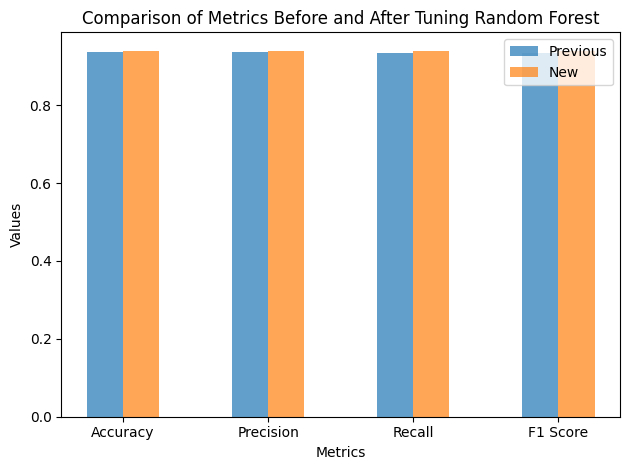

In [94]:
previous_metrics = [0.9356955380577427, 0.9353982300884955, 0.9345711759504863, 0.934984520123839 ]
new_metrics = [0.9400699912510936, 0.9390459363957597, 0.9398762157382847, 0.9394608926204154 ]

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics_names))


# Create the subplots
fig, ax = plt.subplots()
width = .25
ax.bar(x - width/2, previous_metrics, width, label='Previous', alpha=0.7)
ax.bar(x + width/2, new_metrics, width, label='New', alpha=0.7)

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics Before and After Tuning Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
plt.tight_layout()
plt.show()

In [56]:
metrics_df = pd.DataFrame({
    'Metric': metrics_names,
    'Previous': previous_metrics,
    'New': new_metrics,
})

metrics_df

,Metric,Previous,New
0,Accuracy,0.935696,0.940070
1,Precision,0.935398,0.939046
2,Recall,0.934571,0.939876
3,F1 Score,0.934985,0.939461


There is a slight improvement in Accuracy, Precision, Recall and F1 Score after hyperparameter tuning Random Forest

### Trying dimensionality reduction on original data

Dimensionality Reduction with PCA

In [29]:
data_dr = data.copy()
data_dr = std_sclr.fit_transform(data_dr) # standardizing data
print(data_dr.shape)
data_dr = pd.DataFrame(data_dr, columns=data.columns)
data_dr.head()

(11430, 88)


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,-1.0
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,1.0
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,1.0
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,-1.0
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,-1.0


In [30]:
X = data_dr.drop('status', axis=1)
y = data_dr['status']

In [31]:
n_components = 10
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)

In [32]:
np.shape(X_pca)

(11430, 10)

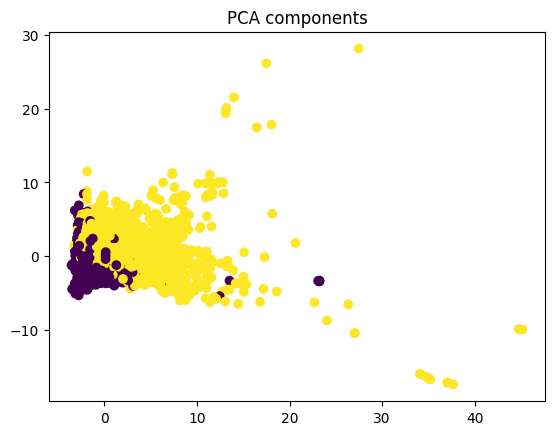

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA components')
plt.show()

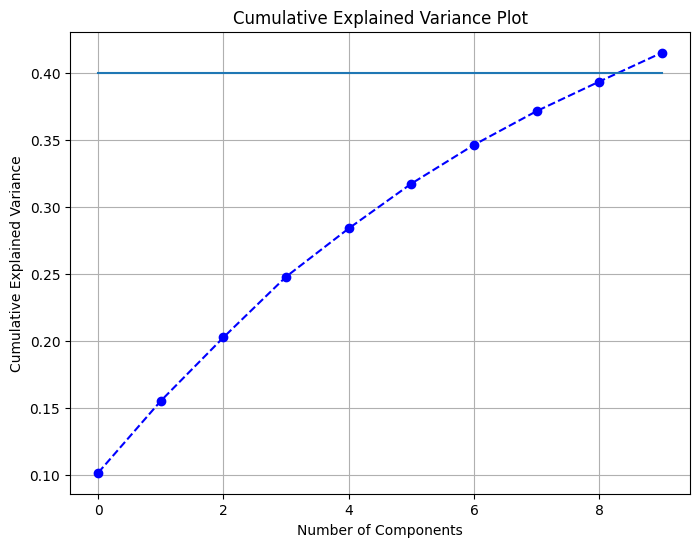

In [42]:
# how much of the total variance in the data is explained cumulatively as you add more principal components

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.plot(range(10), 0.4*np.ones(10))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

We can observe that PCA requires more than 80% of dimensions to be able to explain 90% of the variance, implying that PCA is failing to learn it effectively.

Dimensionality Reduction with t-SNE

In [57]:
n_components = 3
perplexity = 30
n_iter = 5000
tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter = 5000)

X_tsne = tsne.fit_transform(X)

In [60]:
np.shape(X_tsne)

(11430, 3)

### Training and testing models using reduced data using t-sne

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.20, random_state=0)

In [90]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  LogisticRegression() model: 0.8145231846019247 

- Precision: 0.8136645962732919 

- Recall: 0.8107869142351901 

- F1 Score: 0.8122232063773251 

- Confusion Matrix:
[[945 210]
 [214 917]] 



In [91]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  DecisionTreeClassifier() model: 0.9221347331583553 

- Precision: 0.9154315605928509 

- Recall: 0.9283819628647215 

- F1 Score: 0.9218612818261633 

- Confusion Matrix:
[[1058   97]
 [  81 1050]] 



In [92]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  RandomForestClassifier() model: 0.9483814523184602 

- Precision: 0.941586748038361 

- Recall: 0.9549071618037135 

- F1 Score: 0.948200175592625 

- Confusion Matrix:
[[1088   67]
 [  51 1080]] 



In [93]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("- Accuracy on  {} model: {}".format(model, acc), "\n")
print("- Precision:", precision, "\n")
print("- Recall:", recall, "\n")
print("- F1 Score:", f1, "\n")
print("- Confusion Matrix:")
print(conf_matrix, "\n")

- Accuracy on  SVC() model: 0.8910761154855643 

- Precision: 0.8916518650088809 

- Recall: 0.887709991158267 

- F1 Score: 0.8896765618077093 

- Confusion Matrix:
[[1033  122]
 [ 127 1004]] 



Among these Random Forest got better results and got a slight increase in metrics than previous one

### Evaluating models after dimension reduction

Now compare Random Forest results after dimension reduction with previous results

In [95]:
previous_metrics = [0.9400699912510936, 0.9390459363957597, 0.9398762157382847, 0.9394608926204154 ]
new_metrics = [0.9483814523184602,0.941586748038361,0.9549071618037135,0.948200175592625 ]

In [96]:
metrics_df = pd.DataFrame({
    'Metric': metrics_names,
    'Previous': previous_metrics,
    'New': new_metrics,
})

metrics_df

,Metric,Previous,New
0,Accuracy,0.940070,0.948381
1,Precision,0.939046,0.941587
2,Recall,0.939876,0.954907
3,F1 Score,0.939461,0.948200


Trying Cross-validation on data using Random Forest


In [110]:
# Cross-validation on original data(data with reduced features using correlation score)

model = RandomForestClassifier()
scoring = make_scorer(accuracy_score)
scores_tsne = cross_val_score(model, X, y, cv=5, scoring=scoring)

mean_score_tsne = scores_tsne.mean()
print("Average Accuracy (t-SNE Reduced Data):", mean_score_tsne)

Average Accuracy (t-SNE Reduced Data): 0.9653543307086615


In [106]:
# Cross-validation on original data with reduced features using PCA

scoring = make_scorer(accuracy_score)
scores_tsne = cross_val_score(model, X_pca, y, cv=5, scoring=scoring)

mean_score_tsne = scores_tsne.mean()
print("Average Accuracy (t-SNE Reduced Data):", mean_score_tsne)

Average Accuracy (t-SNE Reduced Data): 0.9314085739282589


In [107]:
# Cross-validation on original data with reduced features using t-sne

scoring = make_scorer(accuracy_score)
scores_tsne = cross_val_score(model, X_tsne, y, cv=5, scoring=scoring)

mean_score_tsne = scores_tsne.mean()
print("Average Accuracy (t-SNE Reduced Data):", mean_score_tsne)

Average Accuracy (t-SNE Reduced Data): 0.9405949256342957


Among these Cross-validation on original data with reduced features using correlation score gave the better result
